# EDDYpIGW   (Eddy plus Internal Gravity Waves)
## Study of a jet forcing

Initializes layer thicknesses to rest and currents to 0  (init_fields.type = "rest")  
Forcing periodically with a jet

Parameters:

**Domain** 

* Lx = Ly = 2000.e+3 (2000 km wide in the x and y direction) 
* nx = ny = 256 (256 points in the x and y direction) 

**Forcing**
* type = "qg_vortices"
* q_delx = 50 kms wide, q_dely = 10.* Lh long (in fact this is a jet)
* q_T = 20 days of forcing period
* q_fh = 1e-6, strength of the forcing (PV units)

**The simulations correspond to different shape ofjet**
* rectilinear
* with a curve in the middle 
  * q_ybump = Lh / 2 , central location of the curve 
  * q_delxbump = Lh / 8,  width of the curve in the  X direction
  * q_delybump = Lh / 10,  width of the curve in the  Y direction
* starting with with a curve in the middle, then going flatter and staying flat after
  * q_decay_start = 100. * 86400, start time of the flattening
  * q_decay_length = 10. * 86400, duration of the flattening

**and different vertical forcing**
* baroclinic forcing
* amplified at the surface

**and bottom friction**
* R = 1∕(100*86400)

In [1]:
import os
import numpy as np
from glob import glob
import fnmatch
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import animation
from fluidsim import load_sim_for_plot

--- 

## Load data

In [2]:
runpath = []
simdir = []
title = []

# flat jet
runpath.append("/home1/datawork/slgentil/fluidsim/perio20j_jet50kms_0a480j/data")
simdir.append("/sw2l_test_forcing_256x256_S2000000x2000000_2018-11-14_14-55-30")    # 0 a 480j
title.append("flat jet")

# flat jet with amplified forcing at the surface
runpath.append("/home1/datawork/slgentil/fluidsim/perio20j_jet50kms_forcsurf_0a480j/data")
simdir.append("/sw2l_test_forcing_256x256_S2000000x2000000_2018-11-15_09-20-37")   # 0 a 480j
title.append("flat jet, surface amplified forcing")

# curved jet
runpath.append("/home1/datawork/slgentil/fluidsim/perio20j_jetbump_0a480j/data")
simdir.append("/sw2l_test_forcing_256x256_S2000000x2000000_2018-11-14_15-01-33")   # 0 a 480j
title.append("curved jet")

# curved jet with amplified forcing at the surface
runpath.append("/home1/datawork/slgentil/fluidsim/perio20j_jetbump_forcsurf_0a480j/data")
simdir.append("/sw2l_test_forcing_256x256_S2000000x2000000_2018-11-15_09-20-36")   # 0 a 480j
title.append("curved jet, surface amplified forcing")

# curved then flat jet
runpath.append("/home1/datawork/slgentil/fluidsim/period20_jetcurvflat_0a480j/data")
simdir.append("/sw2l_test_forcing_256x256_S2000000x2000000_2018-11-15_12-43-40")   # 0 a 480j
title.append("curved then flat jet")

# curved then flat jet with amplified forcing at the surface
runpath.append("/home1/datawork/slgentil/fluidsim/period20_jetcurvflat_forcsurf_0a480j/data")
simdir.append("/sw2l_test_forcing_256x256_S2000000x2000000_2018-11-15_15-37-16")   # 0 a 480j
title.append("curved then flat jet, surface amplified forcing")

# curved then flat jet with amplified forcing at the surface and bottom friction
runpath.append("/home1/datawork/slgentil/fluidsim/period20_jetcurvflat_forcsurf_bottomfric_0a480j/data")
simdir.append("/sw2l_test_forcing_256x256_S2000000x2000000_2018-11-20_10-21-08")   # 0 a 480j
title.append("curved then flat jet, surface amplified forcing bottom friction")

nbsimu = len(runpath)

In [3]:

files=[]
for p, d in zip(runpath, simdir):
    # list state_phys_*.nc files
    filenames = glob(p+d+'/state_phys_*.nc')
    # exclude files *it=* generated by restart simulation
    for ind, ii in enumerate(filenames):
        if fnmatch.fnmatch(ii, '*it=*'):
            filenames.remove(ii)
    # Sort files state_phys_t"date".nc by date
    filenames = sorted(filenames, key=lambda x: float(x.strip('.nc').split('phys_t')[1]) )
    files.append(filenames)

In [4]:
%%capture

sim=[]
for i in range(nbsimu):
#for p, d in zip(runpath, simdir):
    # load simulation parameters
    sim.append(load_sim_for_plot(p+d))
    # temporary work around, see: https://bitbucket.org/fluiddyn/fluidsim_ocean/issues/6/implementation-of-forcing
    sim[i].output.init_with_initialized_state() 


In [5]:
ds = []
for i in range(nbsimu):
    ds.append(xr.open_mfdataset(files[i], concat_dim='time', engine='h5netcdf', group='state_phys'))
print(ds)

[<xarray.Dataset>
Dimensions:  (time: 481, x: 256, y: 256)
Dimensions without coordinates: time, x, y
Data variables:
    h0       (time, y, x) float64 dask.array<shape=(481, 256, 256), chunksize=(1, 256, 256)>
    h1       (time, y, x) float64 dask.array<shape=(481, 256, 256), chunksize=(1, 256, 256)>
    rot0     (time, y, x) float64 dask.array<shape=(481, 256, 256), chunksize=(1, 256, 256)>
    rot1     (time, y, x) float64 dask.array<shape=(481, 256, 256), chunksize=(1, 256, 256)>
    ux0      (time, y, x) float64 dask.array<shape=(481, 256, 256), chunksize=(1, 256, 256)>
    ux1      (time, y, x) float64 dask.array<shape=(481, 256, 256), chunksize=(1, 256, 256)>
    uy0      (time, y, x) float64 dask.array<shape=(481, 256, 256), chunksize=(1, 256, 256)>
    uy1      (time, y, x) float64 dask.array<shape=(481, 256, 256), chunksize=(1, 256, 256)>
Attributes:
    what:                 obj state_phys for fluidsim
    name_type_variables:  state_phys
    time:                 0
    it:

In [6]:
for i in range(nbsimu):
    tstart=ds[i].attrs['time']
    tend = sim[i].info.params.time_stepping.t_end
    Lx=sim[i].info.params.oper.Lx
    Ly=sim[i].info.params.oper.Ly
    nx=sim[i].info.params.oper.nx
    ny=sim[i].info.params.oper.ny
    ntimes = len(ds[i].time)
    ds[i]=ds[i].assign_coords(x=(np.linspace(0,Lx,nx)/1000.))
    ds[i]=ds[i].assign_coords(y=(np.linspace(0,Ly,ny)/1000.))
    ds[i]=ds[i].assign_coords(time=(np.linspace(tstart,tend,ntimes)/86400.))

---

## Snapshots

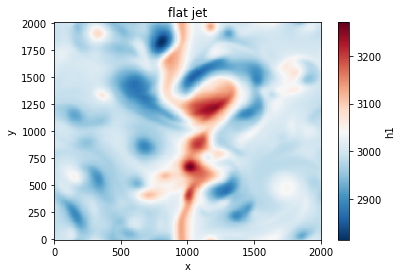

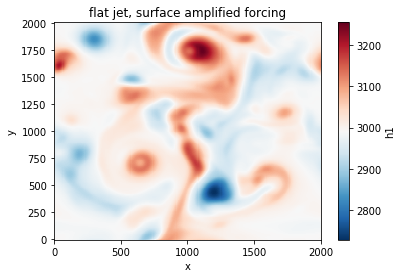

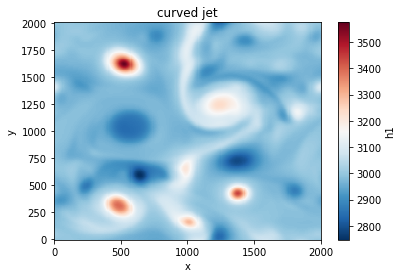

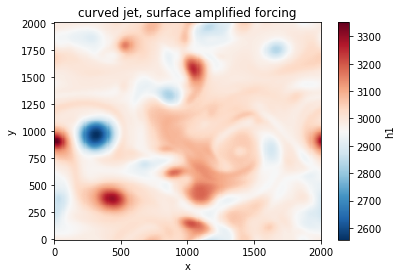

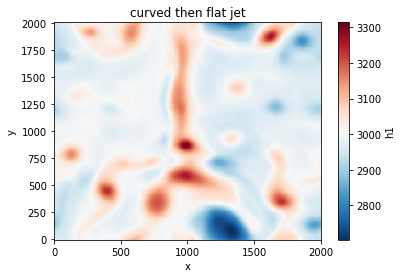

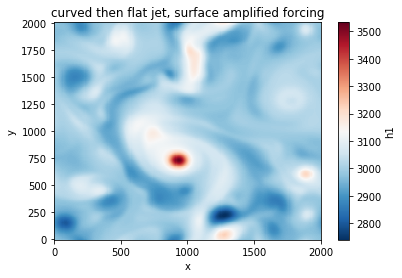

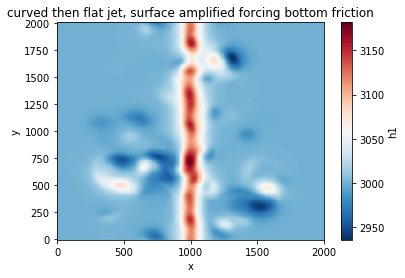

In [7]:
for i in range(nbsimu):
    #plt.figure(figsize=(8,7))
    plt.figure()
    ds[i].h1.isel(time=len(ds[i].time)-1).plot(cmap="RdBu_r")
    plt.title(title[i])

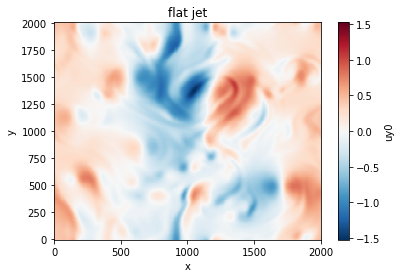

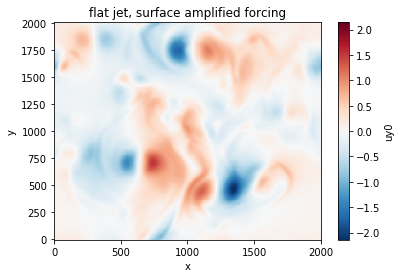

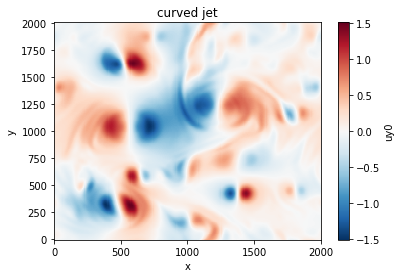

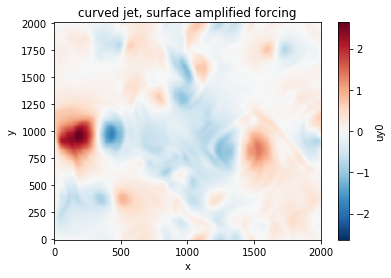

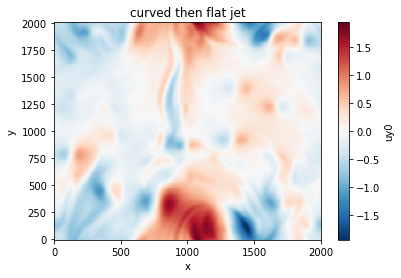

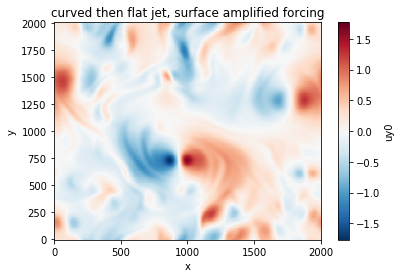

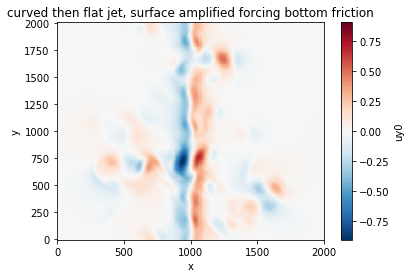

In [8]:
for i in range(nbsimu):
    #plt.figure(figsize=(8,7))
    plt.figure()
    ds[i].uy0.isel(time=len(ds[i].time)-1).plot()
    plt.title(title[i])

---
## Energetics

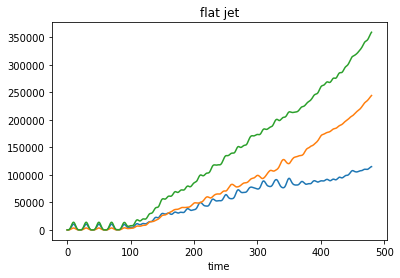

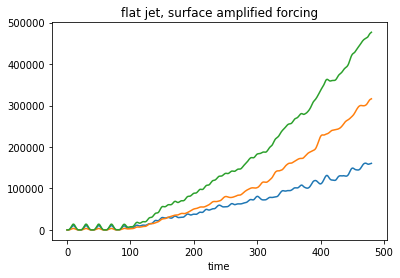

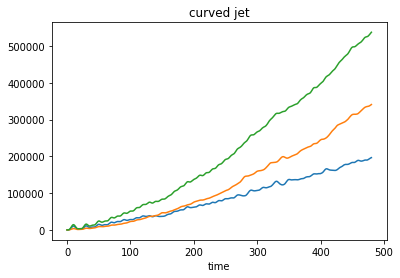

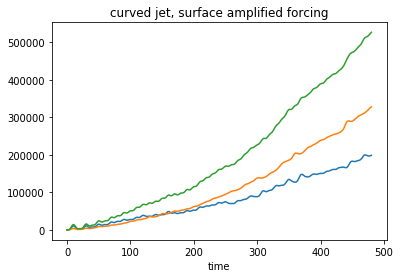

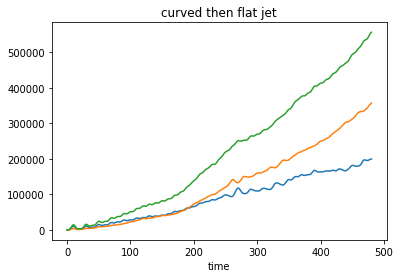

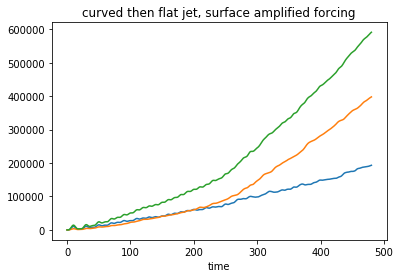

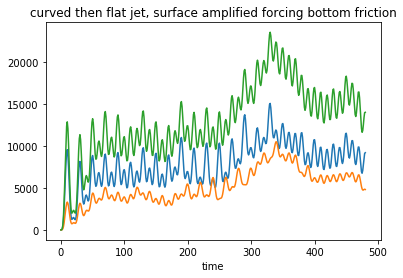

In [9]:
for i in range(nbsimu):
    KE0 = (.5*1034*ds[i].h0*(ds[i].ux0**2+ds[i].uy0**2)).rename("KE0")
    KE1 = (.5*1034*ds[i].h1*(ds[i].ux1**2+ds[i].uy1**2)).rename("KE1")
    KE0M = KE0.mean(dim=("x","y"))
    KE1M = KE1.mean(dim=("x","y"))
    plt.figure()
    KE0M.plot()
    KE1M.plot()
    (KE0M+KE1M).plot()
    plt.title(title[i])

4553.920156952063
3327.9042952765335
5397.646951698293
5709.818561483986
6709.602764735258
7934.779500262295
55.04702156359172


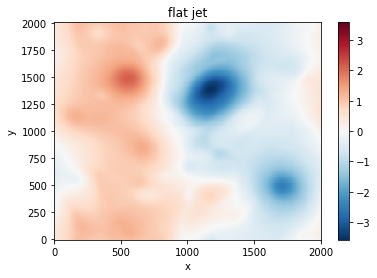

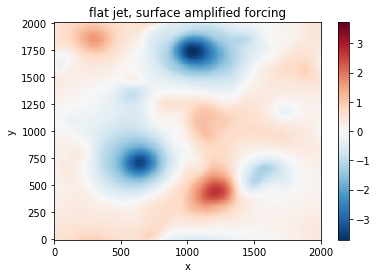

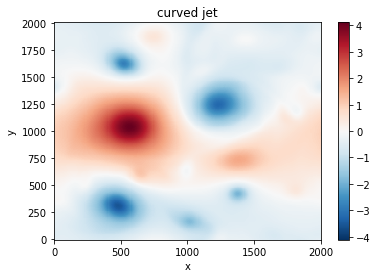

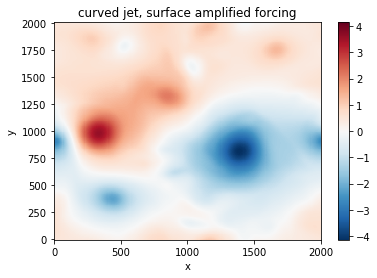

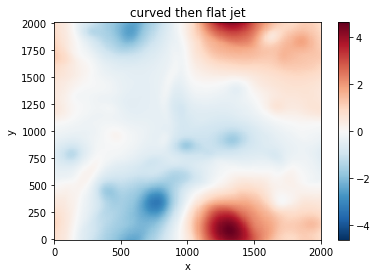

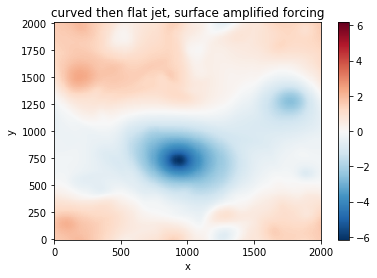

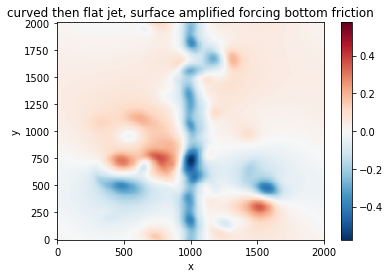

In [10]:
# APE
for i in range(nbsimu):
    lds = ds[i].isel(time=len(ds[i].time)-1)
    z0 = (lds.h1 + lds.h0)
    eta0 = z0-z0.mean(dim=['x','y'])
    plt.figure()
    eta0.plot()
    plt.title(title[i])

    print(.5*9.81*1035*(eta0**2).mean().values)


---
## Movies

In [11]:
%%capture

anim=[]
for n in range(nbsimu):
    var = ds[n].uy0
    #fig=plt.figure(figsize=(8,7))
    fig=plt.figure()
    ax = fig.gca()
    #ax = fig.add_subplot(111)

    count = len(ds[n].time)
    vmin = np.min(var.isel(time=count-1).values)
    vmax = np.max(var.isel(time=count-1).values)
    if vmin < 0.:
        vmin = - min(abs(vmin),abs(vmax))
        vmax = -vmin
    else:
        vmax = np.max(var.isel(time=count-1).values)
    ims = []
    for i in range(0,count-1,2):
        if i==1:
            im1 = var.isel(time=i).plot(vmin=vmin, vmax=vmax, cmap="RdBu_r")
        else:
            im1 = var.isel(time=i).plot(vmin=vmin, vmax=vmax, cmap="RdBu_r", add_colorbar=False)
        tx1  = plt.text(0.1, 0.8, r'$time$ = %.f days' % ds[n].time.values[i], fontsize=15)
        tx2 = ax.set_title(title[n])
        ims.append([im1,tx1,tx2])

    anim.append(animation.ArtistAnimation(fig, ims, interval=200))
    #anim[n].save('movie.mp4',writer='ffmpeg')

In [12]:
from IPython.display import HTML
for n in range(nbsimu):
    display(HTML(anim[n].to_html5_video()))

In [ ]:
%%capture
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

anim=[]
for n in range(nbsimu):
    var = ds[n].h1
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    count = len(ds[n].time)
    ims = []
    for i in range(1,count):
        surf = ax.plot_surface(var.x, var.y, var.isel(time=i), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
        ims.append([surf])

    anim.append(animation.ArtistAnimation(fig, ims, interval=200))



In [ ]:
from IPython.display import HTML
for n in range(nbsimu):
    display(HTML(anim[n].to_html5_video()))

---

## notes

- coordinate informations (time, x, y) are not in ds

---

## traditional way

In [72]:
sim = load_sim_for_plot(simdir)
# temporary work around, see: https://bitbucket.org/fluiddyn/fluidsim_ocean/issues/6/implementation-of-forcing
sim.output.init_with_initialized_state() 

tend=sim.info.params.time_stepping.t_end
Lx=sim.info.params.oper.Lx
Ly=sim.info.params.oper.Ly
nx=sim.info.params.oper.nx
ny=sim.info.params.oper.ny
x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)
ntimes = len(ds.time)
time = np.linspace(0,tend,ntimes)/86400.
print(time)



*************************************
Program fluidsim
sim:                <class 'fluidsim_ocean.sw2l.solver.Simul'>
sim.oper:           <class 'fluidsim.solvers.sw1l.operators.OperatorsPseudoSpectralSW1L'>
sim.output:         <class 'fluidsim_ocean.sw2l.output.OutputSW2L'>
sim.state:          <class 'fluidsim_ocean.sw2l.state.StateSW2L'>
sim.time_stepping:  <class 'fluidsim_ocean.time_stepping.TimeSteppingPseudoSpectralSWnL'>
sim.init_fields:    <class 'fluidsim_ocean.sw2l.init_fields.InitFieldsSW2L'>

solver sw2l, RK4 and sequential,
type fft: fluidfft.fft2d.with_pyfftw
nx =      4 ; ny =      4
lx = 2000000 ; ly = 2000000
path_run =
/home1/datawork/slgentil/fluidsim/vortice/data/sw2l_test_forcing_256x256_S2000000x2000000_2018-11-08_09-24-04
init_fields.type: constant

Initialization outputs:
sim.output.phys_fields:       <class 'fluidsim.base.output.phys_fields2d.PhysFieldsBase2D'>

Memory usage at the end of init. (equiv. seq.): 7728.21484375 Mo
Size of state_spect (equiv. seq.): 

In [86]:
%matplotlib widget

In [87]:

sim.output.phys_fields.plot(field="uy0")

FigureCanvasNbAgg()

TypeError: Length of x must be number of columns in z.

In [88]:
sim.output.phys_fields.animate('uy0')

dt_equations = 86400.0000


FigureCanvasNbAgg()

In [18]:
df = sim.output.print_stdout.load()
print(df)

             Penstrophy      Kenergy      Aenergy      Tenergy
0.0                 inf       0.0000      0.00000       0.0000
86400.0    1.379673e-08   28077.8013   9826.69642   37904.4977
172800.0   1.379670e-08   79018.1509  27962.15590  106980.3070
259200.0   1.379684e-08  130561.3300  46629.33940  177190.6700
345600.0   1.379675e-08  181365.4650  64998.71900  246364.1840
432000.0   1.379737e-08  223987.1510  80215.51820  304202.6690
518400.0   1.379789e-08  237320.5870  85277.88280  322598.4700
604800.0   1.379678e-08  232861.2140  84300.14090  317161.3550
691200.0   1.379787e-08  233745.7060  84605.45350  318351.1600
777600.0   1.379785e-08  232695.8460  84353.60280  317049.4490
864000.0   1.379829e-08  233244.2410  84644.85780  317889.0980
950400.0   1.379833e-08  232819.4660  84798.14730  317617.6130
1036800.0  1.379872e-08  232904.6300  85032.51330  317937.1440
1123200.0  1.379870e-08  232791.8090  84926.51640  317718.3250
1209600.0  1.379881e-08  232879.6210  84900.33170  3177

In [89]:
df.plot(subplots=True)

FigureCanvasNbAgg()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1518243629e8>,
      dtype=object)

In [19]:
print(simdir)

/Users/slgentil/models/fluidsim/run/data/sw2l_test_forcing_64x64_S2000000x2000000_2018-10-30_14-05-07
